In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('Car_Purchasing_Data.csv', encoding='ISO-8859-1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    float64
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [4]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [5]:
df.head(4)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313


# EDA

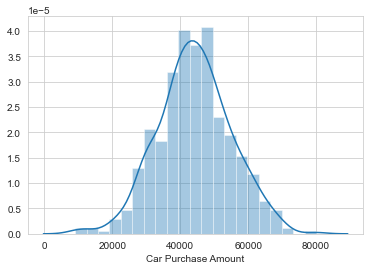

In [6]:
sns.distplot(df['Car Purchase Amount'])

In [7]:
df.corr()['Car Purchase Amount'].sort_values()[1:-1]

Credit Card Debt    0.028882
Net Worth           0.488580
Annual Salary       0.617862
Age                 0.632865
Name: Car Purchase Amount, dtype: float64

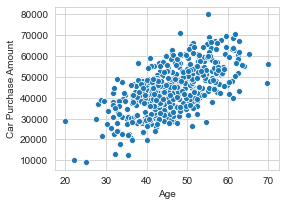

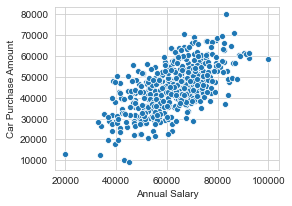

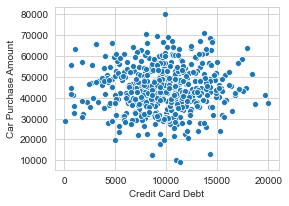

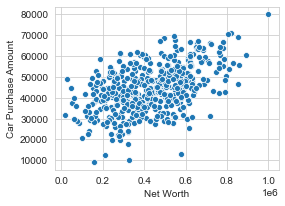

In [8]:
for i in df.iloc[:,4:8]:
    plt.figure(figsize=(4,3))
    sns.scatterplot(x=i, y='Car Purchase Amount', data=df)
    plt.show()

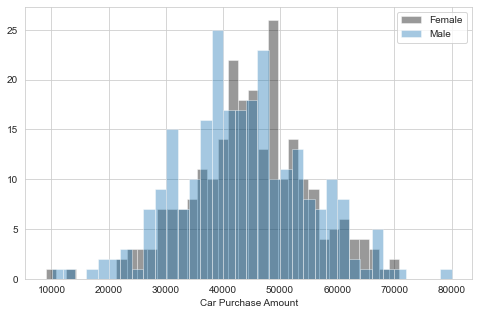

In [9]:
plt.figure(figsize=(8,5))
sns.distplot(df[df['Gender'] == 0]['Car Purchase Amount'], kde=False, color='black', bins=35, label='Female')
sns.distplot(df[df['Gender'] == 1]['Car Purchase Amount'], kde=False, bins=35, label='Male')
plt.legend()

In [10]:
df.groupby('Gender').mean()

,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
Gender,,,,,
0,46.761847,62559.128313,9522.298721,432948.721130,44933.131928
1,45.733838,61705.593322,9690.967353,430037.639104,43503.620644


In [11]:
# sns.countplot(df['Gender'])

# processing data

In [12]:
df = df.drop(['Customer Name', 'Customer e-mail', 'Country'], axis=1)

In [13]:
df.columns = ['gender', 'age', 'annual_salary', 'credit_card_debt', 'net_worth',
       'car_purchase_amount']

In [14]:
df.head()

,gender,age,annual_salary,credit_card_debt,net_worth,car_purchase_amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop('car_purchase_amount', axis=1)
y = df['car_purchase_amount']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
X_train.shape, X_test.shape, y_train.shape

((375, 5), (125, 5), (375,))

# KNN model

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [20]:
error_list = []
for i in range(1,40):
    knn = KNeighborsRegressor(i)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    error = np.sqrt(mean_squared_error(y_test, knn_pred))
    error_list.append(error)

    

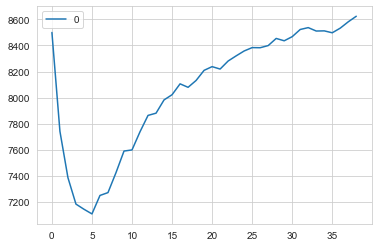

In [21]:
pd.DataFrame(error_list).plot()

# k = 6 is giving the lowest error

# Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
error_list_ = []
for i in [50,100,150,200,250]:
    rf = RandomForestRegressor(i)
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    error_ = np.sqrt(mean_squared_error(y_test, rf_pred))
    error_list_.append(error_)

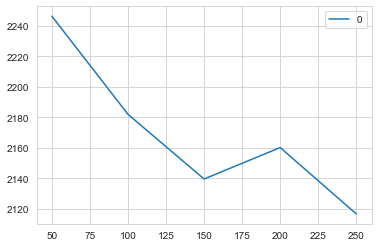

In [24]:
pd.DataFrame(error_list_, index=[50,100,150,200,250]).plot()
# lowest error at i = 250

In [25]:
rf = RandomForestRegressor(250)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, rf_pred)))

2103.857731437745


In [26]:
rf.predict(np.array([[0, 41.851720, 62812.09301, 11609.380910,238961.2505 ]]))

array([37369.12637172])

# Scaling Data

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scale=MinMaxScaler()

In [29]:
X_train = scale.fit_transform(X_train)

In [30]:
X_test = scale.transform(X_test)

In [31]:
X_test.shape, y_test.shape, X_train.shape

((125, 5), (125,), (375, 5))

# Artificial Neural Network

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [33]:
ann = Sequential()
ann.add(Dense(64, input_shape=(5,), activation='relu'))
ann.add(Dense(64, activation='relu'))
ann.add(Dense(64, activation='relu'))
ann.add(Dense(64, activation='relu'))


ann.add(Dense(1, activation='linear'))

ann.compile(optimizer='adam', loss='mse')

In [34]:
ann.fit(X_train, y_train.values, epochs=150, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/150
19/19 [==============================] - 0s 9ms/step - loss: 2065755648.0000 - val_loss: 1952280960.0000
Epoch 2/150
19/19 [==============================] - 0s 3ms/step - loss: 2065376384.0000 - val_loss: 1951373056.0000
Epoch 3/150
19/19 [==============================] - 0s 3ms/step - loss: 2063010816.0000 - val_loss: 1946123392.0000
Epoch 4/150
19/19 [==============================] - 0s 3ms/step - loss: 2051244288.0000 - val_loss: 1923103488.0000
Epoch 5/150
19/19 [==============================] - 0s 3ms/step - loss: 2007567744.0000 - val_loss: 1846101504.0000
Epoch 6/150
19/19 [==============================] - 0s 3ms/step - loss: 1877666944.0000 - val_loss: 1641513728.0000
Epoch 7/150
19/19 [==============================] - 0s 3ms/step - loss: 1578631552.0000 - val_loss: 1215894656.0000
Epoch 8/150
19/19 [==============================] - 0s 3ms/step - loss: 1040488832.0000 - val_loss: 578111872.0000
Epoch 9/150
19/19 [==============================] - 0s 3ms/step 

19/19 [==============================] - 0s 4ms/step - loss: 11333967.0000 - val_loss: 8840733.0000
Epoch 73/150
19/19 [==============================] - 0s 4ms/step - loss: 10969644.0000 - val_loss: 8290853.5000
Epoch 74/150
19/19 [==============================] - 0s 3ms/step - loss: 10502776.0000 - val_loss: 8085464.5000
Epoch 75/150
19/19 [==============================] - 0s 3ms/step - loss: 10170505.0000 - val_loss: 7710801.0000
Epoch 76/150
19/19 [==============================] - 0s 4ms/step - loss: 9704980.0000 - val_loss: 7261643.0000
Epoch 77/150
19/19 [==============================] - 0s 3ms/step - loss: 9347395.0000 - val_loss: 7218230.5000
Epoch 78/150
19/19 [==============================] - 0s 3ms/step - loss: 8793289.0000 - val_loss: 6606844.5000
Epoch 79/150
19/19 [==============================] - 0s 3ms/step - loss: 8566502.0000 - val_loss: 6496908.0000
Epoch 80/150
19/19 [==============================] - 0s 4ms/step - loss: 8124024.5000 - val_loss: 6091375.0000
E

19/19 [==============================] - 0s 3ms/step - loss: 54213.9414 - val_loss: 31611.0059
Epoch 146/150
19/19 [==============================] - 0s 3ms/step - loss: 51135.0781 - val_loss: 28821.2871
Epoch 147/150
19/19 [==============================] - 0s 3ms/step - loss: 47563.9102 - val_loss: 26443.0566
Epoch 148/150
19/19 [==============================] - 0s 3ms/step - loss: 45268.0430 - val_loss: 24905.9961
Epoch 149/150
19/19 [==============================] - 0s 3ms/step - loss: 42852.9297 - val_loss: 22693.8535
Epoch 150/150
19/19 [==============================] - 0s 3ms/step - loss: 40393.3359 - val_loss: 21406.7012


In [35]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 12,929
Trainable params: 12,929
Non-trainable params: 0
_________________________________________________________________


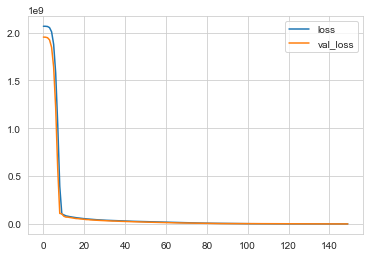

In [36]:
pd.DataFrame(ann.history.history).plot()

In [37]:
ann.evaluate(X_train, y_train)

12/12 [==============================] - 0s 978us/step - loss: 35514.2773


35514.27734375

In [38]:
prediction= ann.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error,r2_score

In [40]:
print(np.sqrt(mean_squared_error(y_test, prediction)))
print(r2_score(y_test, prediction))


86.05041200907412
0.9999303102631332


In [41]:
pred_df  =pd.DataFrame(prediction, y_test.values).reset_index()
pred_df.columns = ['prediction', 'expected_value']

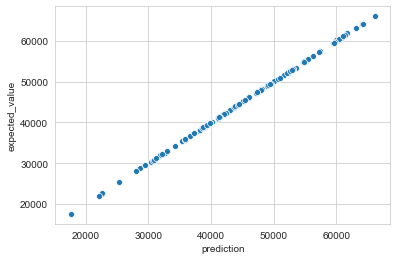

In [42]:
sns.scatterplot(x='prediction', y='expected_value', data=pred_df)

Text(0.5, 1.0, 'Error')

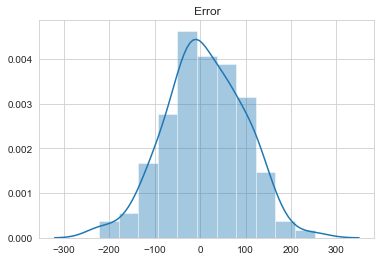

In [43]:
sns.distplot(pred_df.apply(lambda x: x[0]-x[1], axis=1))
plt.title('Error')